## P(x) of a point from PDF:

In [20]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
np.random.seed(23)

### Read Data for Cpu utilization

In [22]:
df = pd.read_csv('df_merged.csv', parse_dates=['days'], index_col='days')
df = df[['cpu_utilization_pctg_extrapolated']]
df.columns = ['cpu_util_pctg']
df.sample(5)

,cpu_util_pctg
days,
2017-07-21 01:00:00,50.833
2017-04-06 21:00:00,48.611
2017-05-12 21:00:00,58.889
2017-04-17 07:00:00,26.382
2017-04-04 07:00:00,34.167


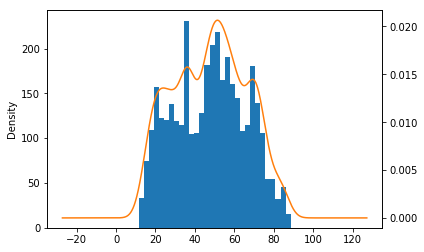

In [23]:
df['cpu_util_pctg'].plot.hist(bins=30)
df['cpu_util_pctg'].plot.kde(secondary_y=True);

In [24]:
from scipy import stats
kernel = stats.gaussian_kde(df['cpu_util_pctg'].values)

In [25]:
df['cpu_util_pctg'].max()

88.611000000000004

In [26]:
df['cpu_util_pctg'].min()

11.389000000000001

#### Find P(x) at a point = Find area between bounds around the points

In [27]:
max_area = kernel.integrate_box(df['cpu_util_pctg'].min(), df['cpu_util_pctg'].max())
max_area

0.9893158859219632

In [28]:
# divide by max area to normalize the total area to 1.0
kernel.integrate_box(88.5, 88.6) / max_area

0.00015228120255645947

In [29]:
kernel.integrate_box(49.9, 50.1) / max_area

0.004127203683746204